In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

from lib import percentage_remap, keep_only_subject, autolabel

MAX_SUBJECTS = 4

In [3]:
df = pandas.read_csv('stud-stat-anonymous.csv')

# Drop the first unlabeled column
df = df.drop(columns=['Unnamed: 0'])
# Cast all columns with percentage values to floats
df['Total Absence'] = df['Total Absence'].map(percentage_remap)

### Total absence distribution

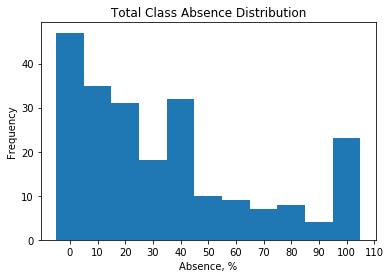

In [4]:
bins = [i * 10 for i in range(0, 12)] # from 0% to 100%
absence = np.array(df['Total Absence'])
plt.hist(absence, bins=bins, align='left', histtype='bar')
plt.xticks(bins)

plt.xlabel('Absence, %')
plt.ylabel('Frequency')
_ = plt.title('Total Class Absence Distribution')

### Restructure data frame

In [5]:
# Recreate the data frame, with the new structure
# This is needed to make sure that we don't have extra
# rows from the initial structure
df = pandas.DataFrame().append([
    keep_only_subject(df, 0, MAX_SUBJECTS),
    keep_only_subject(df, 1, MAX_SUBJECTS),
    keep_only_subject(df, 2, MAX_SUBJECTS),
    keep_only_subject(df, 3, MAX_SUBJECTS)
], ignore_index=True).drop(columns=['Total Absence'])

df = df.dropna()  # drop rows that don't have a subject/absence value
df['Absence'] = df['Absence'].map(percentage_remap)

### Average absence per subject

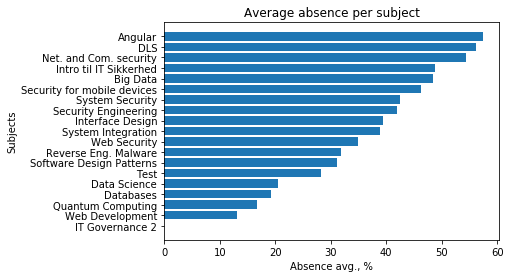

In [66]:
# Mean absence per subject
mean_per_subject = df.groupby(['Subject'])['Absence'].mean().sort_values()
subjects = mean_per_subject.index.to_numpy()
avg_absence = mean_per_subject.to_numpy()

rects = plt.barh(subjects, avg_absence)

# autolabel(rects)

plt.xlabel('Absence avg., %')
plt.ylabel('Subjects')
_ = plt.title('Average absence per subject')

### 5 subjects with the highest absence

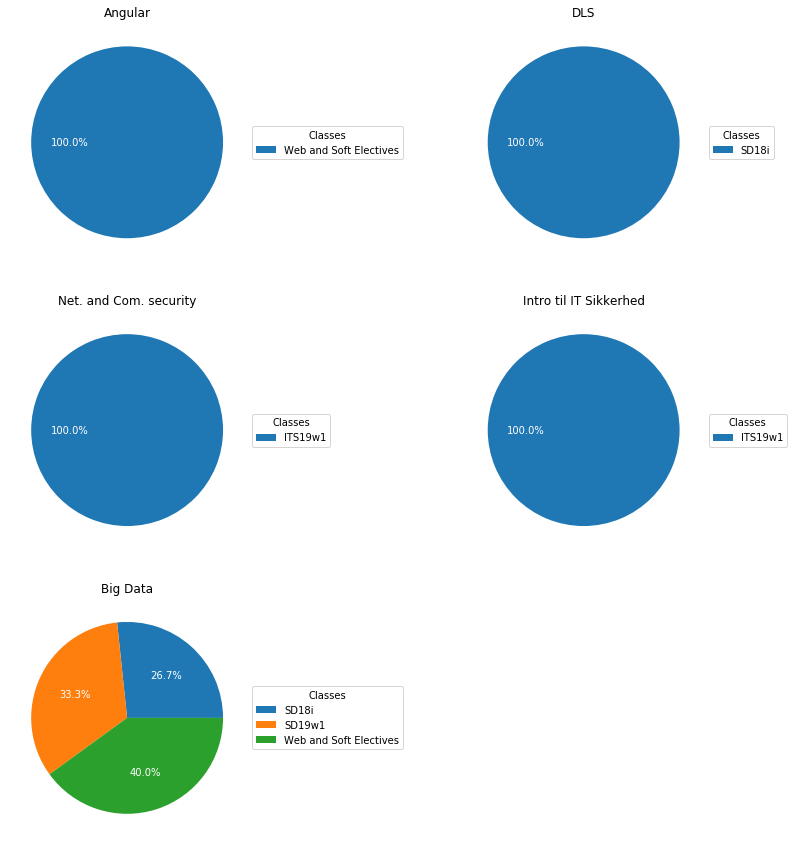

In [120]:
nr_most_skipped = 5
most_skipped_subjects = list(mean_per_subject.index)[-nr_most_skipped:][::-1]

plot_rows = int(nr_most_skipped / 2)
plot_cols = 2

plt.subplots(plot_rows, plot_cols, figsize=(15, 15))

for index, subject in enumerate(most_skipped_subjects):
    students = df.loc[df['Subject'] == subject]
    per_class = students.groupby(['Class'])['Class'].agg(['count']) \
        .rename(columns={'count': 'Student count'})

    slices = per_class['Student count'].to_numpy()
    classes = per_class.index.to_numpy()

    plt.subplot(plot_rows + 1, plot_cols, index + 1)
    wedges, texts, autotexts = plt.pie(slices,
        autopct='%1.1f%%',
        textprops=dict(color='w')
    )
    plt.title(subject)
    plt.legend(wedges, classes,
          title="Classes",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
